# PULSEE $\frac{\pi}{2}$ - Pulse, a Simple Zeeman Interaction

#### Jiwoo Seo, Ilija N.

## Imports

In [4]:
import numpy as np

import pulsee.plot as psplt  # 'psplt' = 'pulsee plot'
from pulsee import operators as op, simulation as sim
from pulsee.pulses import Pulses
# import matplotlib.pylab as plt

## Quantum System Setup
Spin-$\frac{1}{2}$ system with $\gamma/2\pi = 5.00$ MHz/T (see Candoli thesis §4.1) and $B_0 = 2 \pi$ T:

In [5]:
QUANTUM_NUMBERS = [1 / 2]  # spin 1/2
GAMMA_2PIS = [5 / (2 * np.pi)]  # = gamma / 2pi (in units of MHz/T)
B0 = 2 * np.pi
W0 = GAMMA_2PIS[0] * B0 * 2 * np.pi  # Careful with the sign AND DON'T FORGET * 2PI (radial frequency)

zeem_par = {'field magnitude': B0, 'theta_z': 0, 'phi_z': 0}

In [6]:
print('Larmor frequency:', W0 / (2 * np.pi), 'MHz')

Larmor frequency: 5.0 MHz


## Experiment Settings

In [7]:
ACQUISITION_TIME = 50  # in microseconds
T2 = 10

## Hamiltonians
Here we add the desired Hamiltonian interaction terms. Add these to the following dictionary `args` with key as it appears in `nuclear_system_setup` function. The value should be the parameters of the associated Hamiltonian as it appears in `nuclear_system_setup`.

In this example notebook, we have a simple single spin-1/2 system, so no interactions terms in the Hamiltonian exists and `h_dict` is left empty

In [8]:
h_dict = {
}

### Run `sim.nuclear_system_setup` after setting up the arguments

In [9]:
args = h_dict.copy()
spin_par = []
for qn, gam in zip(QUANTUM_NUMBERS, GAMMA_2PIS):
    spin_par.append({'quantum number': qn, 'gamma/2pi': gam})

args['spin_par'] = spin_par
args['zeem_par'] = zeem_par
# Initial state is canocial
spin, h_unperturbed, rho_0 = sim.nuclear_system_setup(**args)

In [10]:
Iz = spin.I['z']
Ix = spin.I['x']
Iy = spin.I['y']

PRINTING OUT DIMS[0]: [2]


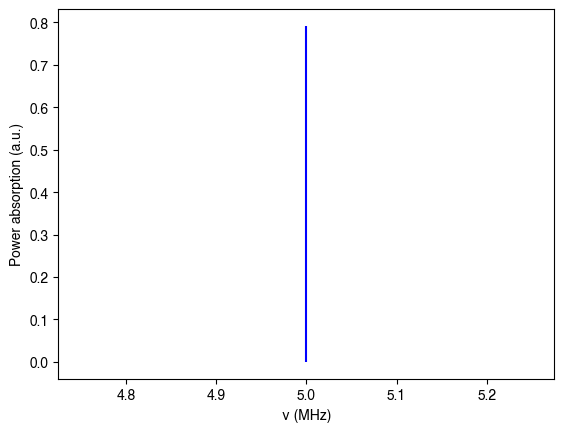

In [11]:
f, p = sim.power_absorption_spectrum(spin, h_unperturbed, normalized=True)
_ = psplt.plot_power_absorption_spectrum(f, p)

## Pulse
Set up single mode pulse of form 
$$\mathbf{B}_1(t) = 2 B_1 \cos(2\pi \nu + \delta)\cdot \hat{\mathbf{n}}(\theta, \phi)$$
where $\theta$ and $\phi$ are the polar and azimuthal angles respectively.

For simplest case apply $\pi/2$ pulse with $B_1 = B_0 / 10 $, $ \nu = (\gamma/2\pi) \cdot B_0 $, $\delta = \phi =0$, $\theta=\pi/2$ --> $I_x$ pulse.

In [12]:
B1 = B0 / 100
PHASE_B1 = np.pi * 0
POLAR_B1 = np.pi / 2  # pulse direction is in the transverse plane
AZIMUTHAL_B1 = 0  # x-direction pulse
TIP_ANGLE = np.pi / 2
PULSE_TIME = TIP_ANGLE / (2 * np.pi * GAMMA_2PIS[0] * B1)  # using gamma/2pi, NOT gamma!
mode = Pulses(frequencies=[W0], amplitudes=[B1], phases=[PHASE_B1], theta_p=[POLAR_B1], phi_p=[AZIMUTHAL_B1],
              pulse_times=[PULSE_TIME])

In [13]:
PULSE_TIME

5.0

##  Simulation

In [14]:
#Evolve the intial state until a square pi/2 pulse is applied using the magnus solver in the interaction picture
evolved_dm = sim.evolve(spin, h_unperturbed, rho_0, solver='magnus', picture='IP',
                        mode=mode, n_points=166, order=1)
evolved_dm

C:\Users\lemon\AppData\Local\pypoetry\Cache\virtualenvs\pulsee-iiqte5zo-py3.11\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
100%|██████████| 166/166 [00:00<00:00, 2184.03it/s]


Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[5.00000000e-01+0.j         7.42674727e-16+0.49999972j]
 [7.42674727e-16-0.49999972j 5.00000000e-01+0.j        ]]

In [15]:
RRF_par = {'nu_RRF': W0 / (2 * np.pi), 'theta_RRF': 0, 'phi_RRF': 0}
RRF_par

{'nu_RRF': 5.0, 'theta_RRF': 0, 'phi_RRF': 0}

In [16]:
#Evolve the intial state until a square pi/2 pulse is applied using the magnus solver  
evolved_dm_magnus = sim.evolve(spin, h_unperturbed, rho_0, solver='magnus', picture='RRF', RRF_par=RRF_par,
                               mode=mode, n_points=30, order=1)
evolved_dm_magnus

100%|██████████| 30/30 [00:00<00:00, 238.10it/s]


Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[5.00000000e-01+0.j         1.53213762e-15+0.49999972j]
 [1.53213762e-15-0.49999972j 5.00000000e-01+0.j        ]]

In [17]:
evolved_dm_mesolve = sim.evolve(spin, h_unperturbed, rho_0, solver='mesolve',
                                mode=mode, n_points=100)
evolved_dm_mesolve

C:\Users\lemon\AppData\Local\pypoetry\Cache\virtualenvs\pulsee-iiqte5zo-py3.11\Lib\site-packages\qutip\solver\solver_base.py:459: FutureWarning: "progress_bar" is now included in options:
 Use `options={"progress_bar": False / True / "tqdm" / "enhanced"}`
  warnings.warn(


10.1%. Run time:   0.01s. Est. time left: 00:00:00:00
20.2%. Run time:   0.02s. Est. time left: 00:00:00:00
30.3%. Run time:   0.03s. Est. time left: 00:00:00:00
40.4%. Run time:   0.04s. Est. time left: 00:00:00:00
50.5%. Run time:   0.05s. Est. time left: 00:00:00:00
60.6%. Run time:   0.06s. Est. time left: 00:00:00:00
70.7%. Run time:   0.06s. Est. time left: 00:00:00:00
80.8%. Run time:   0.07s. Est. time left: 00:00:00:00
90.9%. Run time:   0.08s. Est. time left: 00:00:00:00
100.0%. Run time:   0.08s. Est. time left: 00:00:00:00
Total run time:   0.09s


Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.50000558+2.30568550e-16j 0.00125002+4.99998154e-01j]
 [0.00125002-4.99998154e-01j 0.49999442-2.30568550e-16j]]

In [18]:
op.apply_rot_pulse(rho_0, np.pi / 2, Ix)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5+0.j         0. +0.49999972j]
 [0. -0.49999972j 0.5+0.j        ]]

Intial state


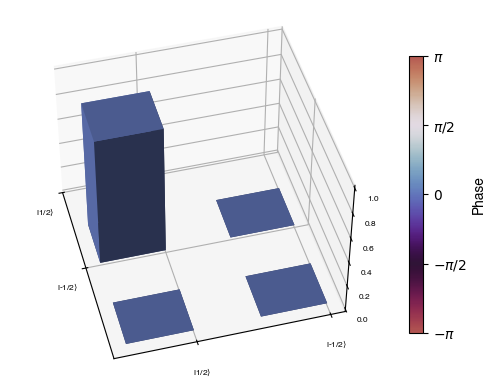

Evolved


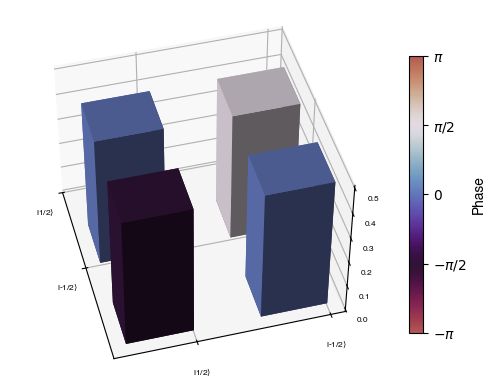

In [19]:
print('Intial state')
_ = psplt.plot_complex_density_matrix(rho_0)
print('Evolved')
_ = psplt.plot_complex_density_matrix(evolved_dm)

# Generate FID

In [20]:
t, fid = sim.FID_signal(spin, h_unperturbed, evolved_dm, acquisition_time=ACQUISITION_TIME, T2=T2, n_points=1000)

C:\Users\lemon\AppData\Local\pypoetry\Cache\virtualenvs\pulsee-iiqte5zo-py3.11\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
C:\Users\lemon\AppData\Local\pypoetry\Cache\virtualenvs\pulsee-iiqte5zo-py3.11\Lib\site-packages\qutip\solver\solver_base.py:459: FutureWarning: "progress_bar" is now included in options:
 Use `options={"progress_bar": False / True / "tqdm" / "enhanced"}`
  warnings.warn(


In [21]:
f, ft = sim.fourier_transform_signal(fid, t, padding=2)

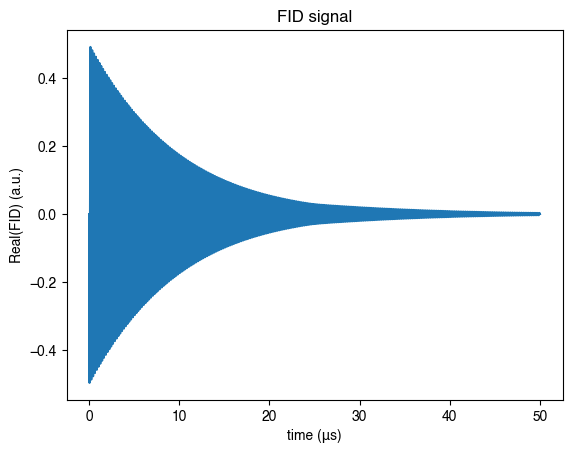

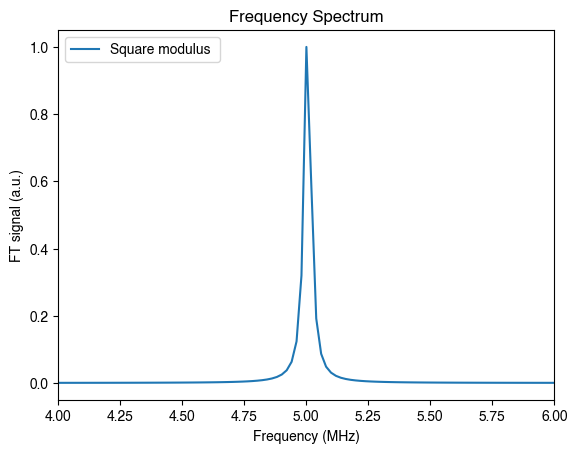

In [22]:
psplt.plot_real_part_FID_signal(t, fid)
_ = psplt.plot_fourier_transform(f, ft, square_modulus=True, save=False, xlim=(4, 6))